# Assignment 3: Interpretable ML

Kelly Tong

Link to Colab: https://colab.research.google.com/drive/1V81qPZxPJc2BOc-t5fouVzqnVuukpUEL#scrollTo=R7aAFYLa8MIx

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1V81qPZxPJc2BOc-t5fouVzqnVuukpUEL#scrollTo=R7aAFYLa8MIx)

In [1]:
## Navigate to the Github Repository
!git clone https://github.com/Kelly0604/Assignment3_InterpretableML.git
%cd /content/Assignment3_InterpretableML
%ls

fatal: destination path 'Assignment3_InterpretableML' already exists and is not an empty directory.
/content/Assignment3_InterpretableML
README.md  WA_Fn-UseC_-Telco-Customer-Churn.csv


## Part 1: Exploratory Analysis
Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.

### Data Preprocessing
- prepare packages
- loading data
- checking missing values
- converting variables

In [2]:
# Import Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from pygam import LogisticGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# check sample size
sample_size = data.shape[0]
print(f'Sample size: {sample_size}')

Sample size: 7043


In [5]:
# check for missing
missing = data.isna().sum()
print(missing)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# check for datatypes
data_types = data.dtypes
data_types

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
# convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
missing_total_charges = data['TotalCharges'].isna().sum()
missing_total_charges
# fill NA in Total Charges with median
median_total_charges = data['TotalCharges'].median()
data['TotalCharges'].fillna(median_total_charges, inplace=True)
data['TotalCharges'].isna().sum()

0

In [8]:
# convert 'Churn' column to binary format: 0 for 'No', 1 for 'Yes'
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

### Assumptions Verifications

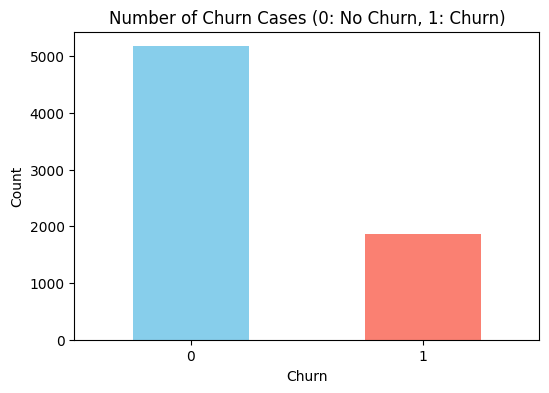

In [9]:
churn_counts = data['Churn'].value_counts()

# Plot the bar plot for the count of 'Churn'
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Churn Cases (0: No Churn, 1: Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

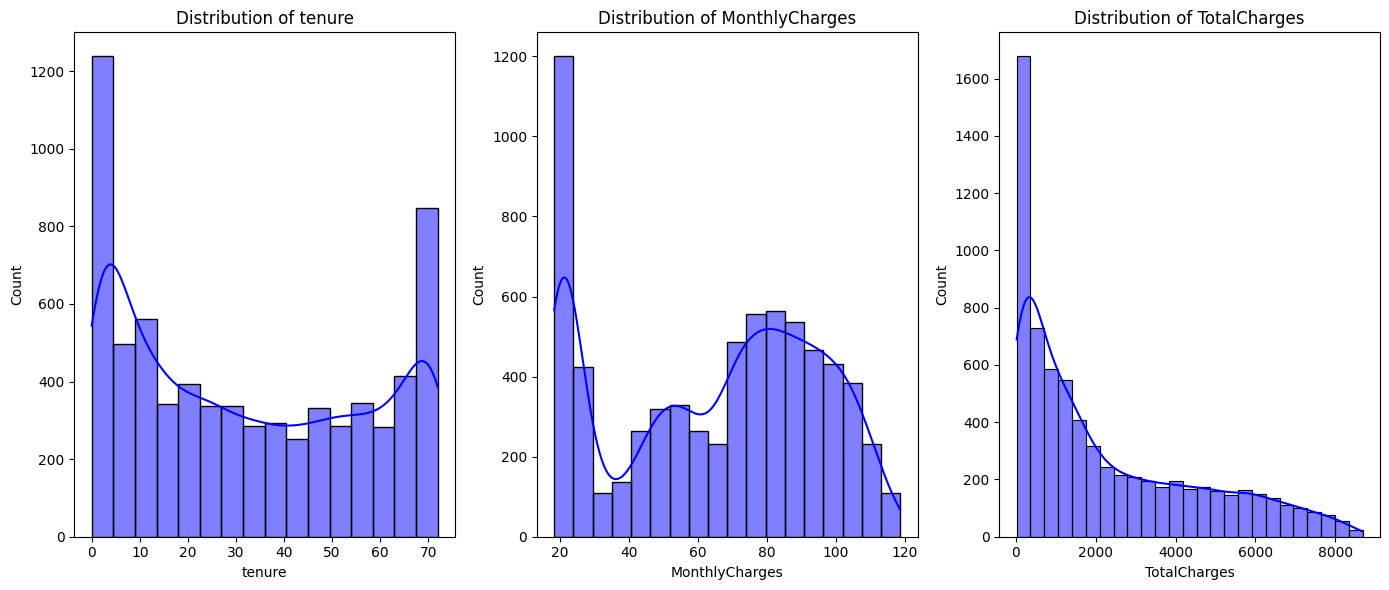

In [10]:
# Univariate Analysis for continuous features
continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(continuous_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

<ipython-input-11-64eafe7bdc0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=data, palette='Set2')
<ipython-input-11-64eafe7bdc0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=data, palette='Set2')
<ipython-input-11-64eafe7bdc0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=data, palette='Set2')


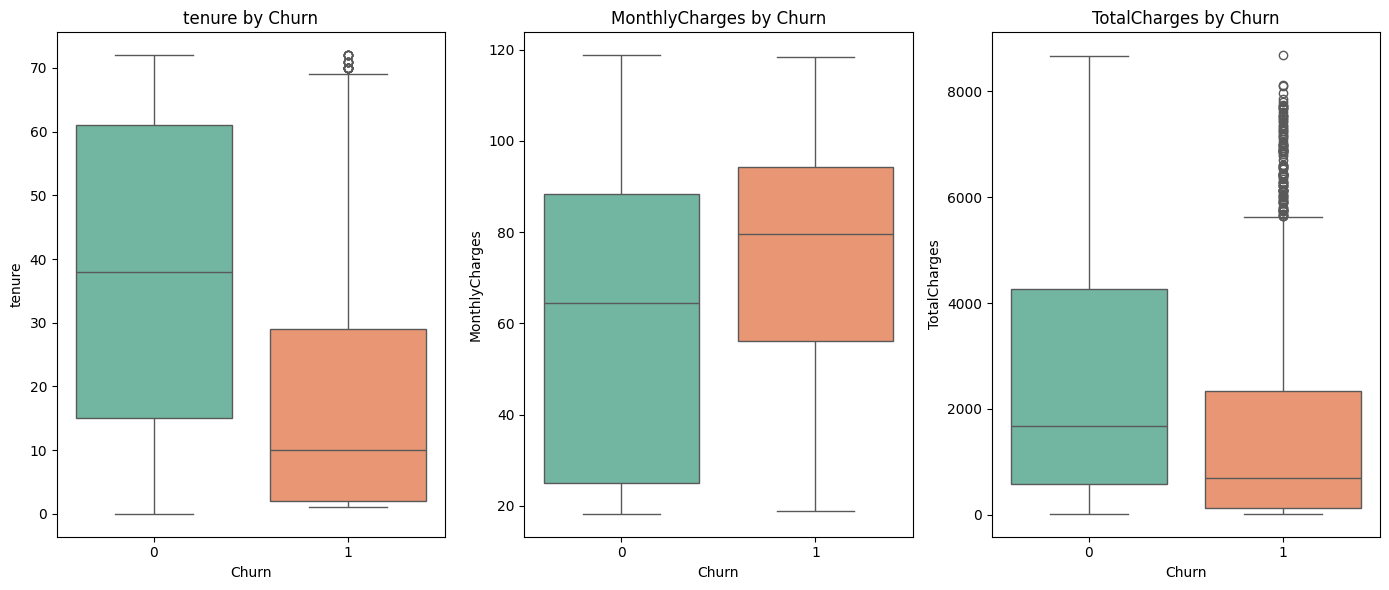

In [11]:
# Bivariate Analysis of continuous variables vs Churn
plt.figure(figsize=(14, 6))
for i, feature in enumerate(continuous_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=feature, data=data, palette='Set2')
    plt.title(f'{feature} by Churn')
plt.tight_layout()
plt.show()

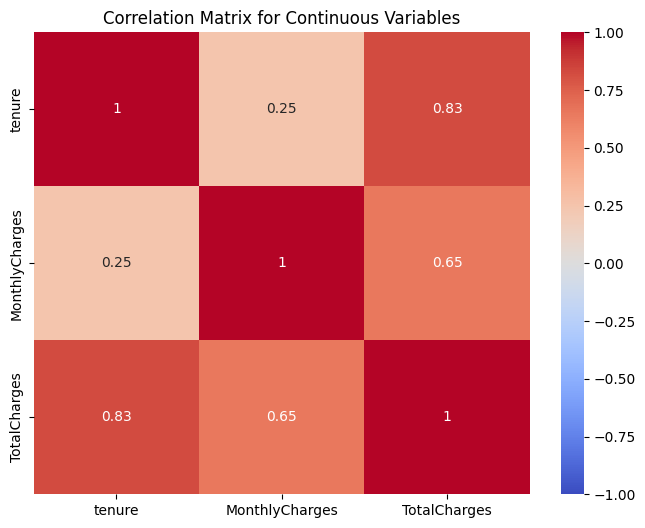

In [12]:
# Correlation matrix for continuous variables
correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Continuous Variables')
plt.show()

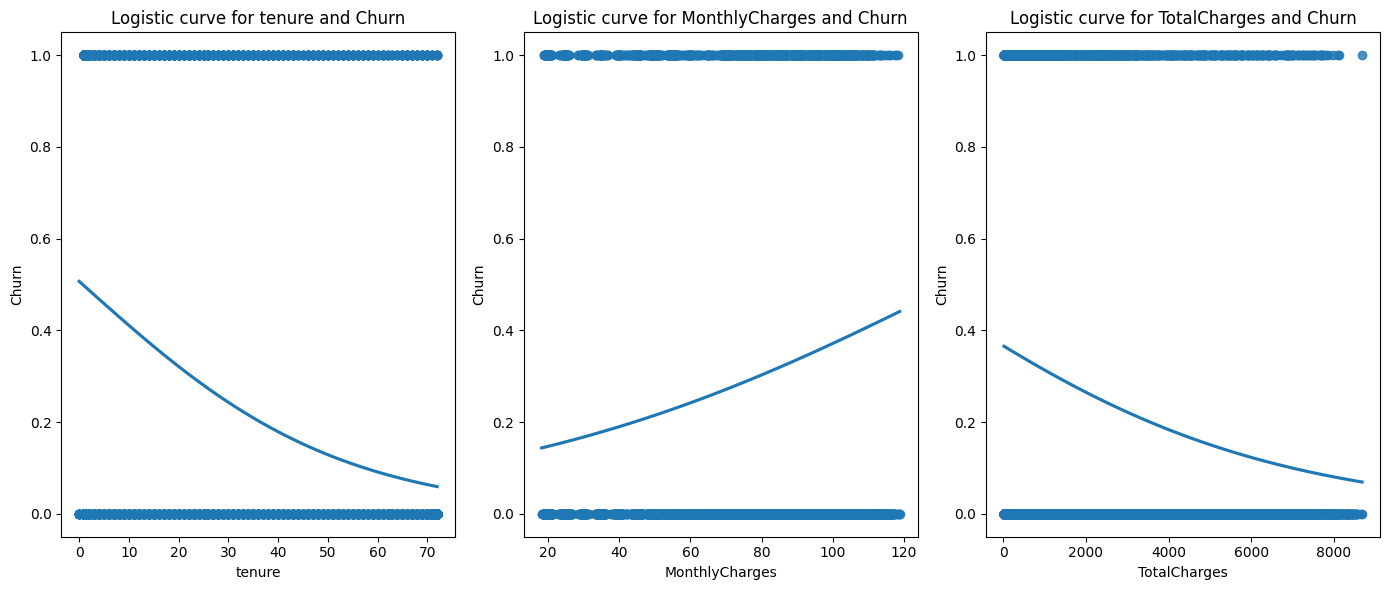

In [13]:
# Logistic regression smoothing curves to check log-odds linearity assumption
plt.figure(figsize=(14, 6))
for i, feature in enumerate(continuous_features):
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=feature, y='Churn', data=data, logistic=True, ci=None)
    plt.title(f'Logistic curve for {feature} and Churn')
plt.tight_layout()
plt.show()


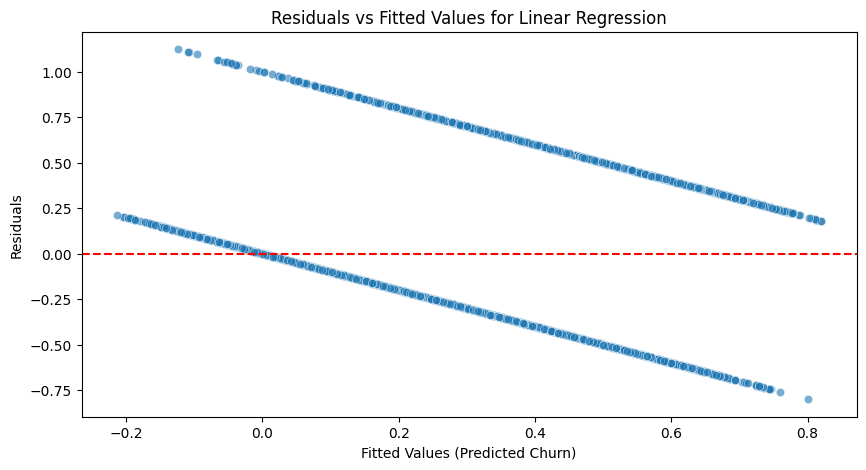

In [14]:
# Residual vs Fitted Value Plot for Linear Regression

data2 = data.drop('customerID', axis=1)

# One-hot encode all categorical variables in the dataset
data_encoded = pd.get_dummies(data2, drop_first=True)

# Separate features and target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the training set to get residuals
y_train_pred = linear_model.predict(X_train)
residuals = y_train - y_train_pred

# Plot residuals vs. fitted values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted Churn)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Linear Regression')
plt.show()


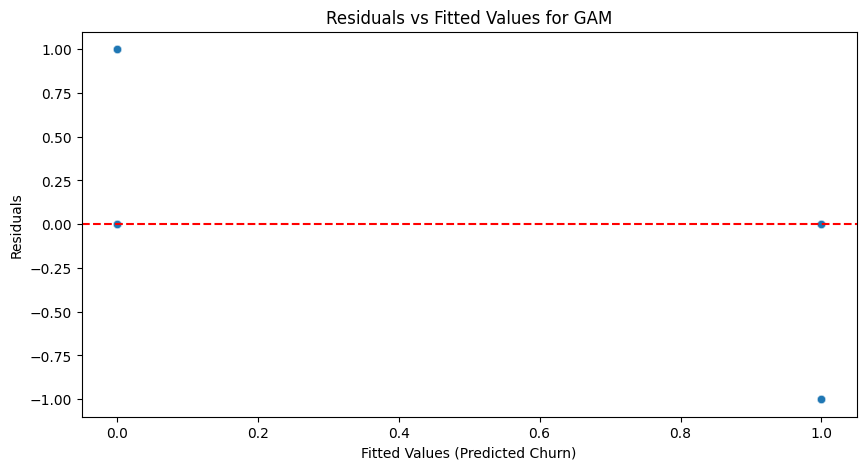

In [15]:
# Fit a basic GAM model
gam = LogisticGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Predict on the training set
y_train_pred_gam = gam.predict(X_train)
residuals_gam = y_train - y_train_pred_gam

# Plot residuals vs fitted values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_train_pred_gam, y=residuals_gam, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted Churn)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for GAM')
plt.show()

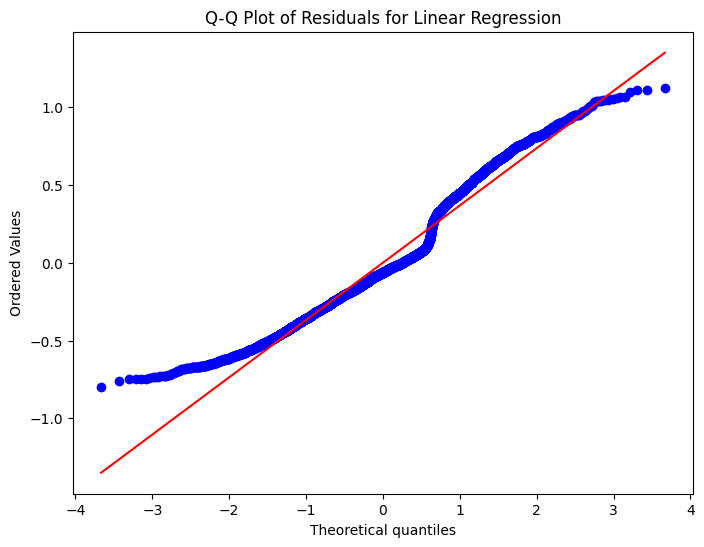

In [16]:
# Q-Q plot for linear regression residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals for Linear Regression')
plt.show()

### Meeting assumptions

**Linear Regression Assumptions:**

`Linearity: `The linearity assumption is violated as some continuous variables display non-linear relationship with the outcome variable "churn". In the logistic regression curves for "tenure", "monthly charges", and "total charges", we can see that a "S-shaped" curve is depicted, suggesting non-linear relationships. This violation of linearity assumption could be potentially caused by the fact that the target variable "churn" is a binary instead of continuous variable.

`Independence:` Independence of data points are ensured with each data representing individual customers, meaning that their actions are not depended on other customers' actions. This is checked with the nature of the data.

`Normality of Residuals: `The Q-Q plot shows a violation of normality. The Q-Q plot displays a noticeable deviation from the reference line, particularly at the tails. The residuals are not normally distributed, with significant departures from normality. This raises concerns on the validity of statistical inferences from the linear model.

`Homoscedasticity:` The residual vs. fitted values plot for linear regression suggests violation of homoscedasticity. The plot shows a distinct pattern where the residuals are not randomly scattered around zero. There is a clear "fan-like" structure with residuals split into two groups, forming almost two straight lines diverging as the fitted values increase. This pattern indicates a violation of the linearity assumption, suggesting that the linear regression model is not adequately capturing the relationship between the predictors and the target variable.

`No Multicollinearity:` The correlation matrix shows high correlation (0.83) between tenure and TotalCharges, which is slightly higher than 0.8 (considered as highly correlated). This indicates potential multicollinearity issues. This suggests that multicollinearity assumption is partially violated.

**Logistic Regression Assumptions:**

`Linearity:` For logistic regression, the linearity of predictors with respect to the log-odds is checked. The logistic regression curves provided indicate non-linear relationships, suggesting that this assumption is violated.

`Independence:` The data naturally recorded information on individual customers, reasonable met the independence assumption.

`No influential outliers:` The box plots for continuous variables have displayed some outliers, particularly in "total charges." This could be a potential feature violating the influential outlier assumption. However, further assessment such as Cook's distance might be needed to check whether these outliers are actually influential.

`Large sample size:` The sample size of the entire dataset is 7043, with around 5000 samples of churn of 0 and around 2000 samples of churn of 1. Although the distribution of samples of churn outcomes is not even, the size of the sample is large enough to validate the assumption.

`No multicollinearity:` The correlation matrix indicates multicollinearity, particularly between tenure and TotalCharges (correlation = 0.83). This suggests potential issues.

**Generalized Additive Model (GAM) Assumptions:**

`Independence of observations:` The data naturally recorded information on individual customers, reasonable to assume independence of observation.

`No multicollinearity:` Like analysis above, the correlation matrix suggests potentiality in violating the multicollinearity assumption.

`Homoscedasticity (constant variance):` The residuals vs. fitted values plot for the GAM does not show a systematic pattern, suggesting that this assumption is not violated. The residuals appear to be tightly centered around zero, with very few points showing large deviations. This suggests that the GAM model is fitting the data much better than the linear regression model. The residuals do not exhibit a systematic pattern or a funnel shape, indicating that the model is potentially addressing the non-linear relationship between the predictors and the target. However, since Churn is a binary outcome, the residuals in a GAM context should be evaluated carefully, as they are not the traditional continuous residuals found in linear regression. In summary, the plot suggests that the GAM model is not suffering from the same linearity or heteroscedasticity issues as the linear regression model. It also suggests that GAM's flexibility allows it to capture certain non-linear relationship in the data.

`Large enough sample size:` The sample size is sufficient for the model.

The presence of non-linear relationships between the features and the target variable suggests that a GAM model would be a better fit as it allows for smooth, flexible relationships between predictors and the outcome.

## Part 2: Linear Regression
Linear Regression: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.

In [17]:
data = data.drop('customerID', axis=1)

# One-hot encode all categorical variables in the dataset
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_test = linear_model.predict(X_test)

# Assess model performance
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mse = mean_squared_error(y_test, y_pred_test)

# Display model performance metrics
print(f'R-squared: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Display the coefficients for interpretation
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients_sorted)


R-squared: 0.3111
Root Mean Squared Error (RMSE): 0.3662
Mean Squared Error (MSE): 0.1341
                                  Feature  Coefficient
10            InternetService_Fiber optic     0.281193
23                    StreamingMovies_Yes     0.107038
21                        StreamingTV_Yes     0.088186
9                       MultipleLines_Yes     0.071420
28         PaymentMethod_Electronic check     0.070590
26                   PaperlessBilling_Yes     0.045429
0                           SeniorCitizen     0.037767
7                        PhoneService_Yes     0.026514
17                   DeviceProtection_Yes     0.021844
5                             Partner_Yes     0.007128
3                            TotalCharges    -0.000042
15                       OnlineBackup_Yes    -0.000836
1                                  tenure    -0.001924
29             PaymentMethod_Mailed check    -0.003805
27  PaymentMethod_Credit card (automatic)    -0.004398
2                          Mon

### Model Performance

The model performance is summarized with R-squared value is 0.3111, the RMSE value is 0.3662, the MSE value is 0.1341.

An `R-squared` value of 0.3111 indicates that about 31.11% of the variance in churn can be explained by the model. This suggests that the linear regression model is capturing some relationship between the predictors and churn, but a large proportion of the variance (approximately 68.89%) remains unexplained. In the context of predicting churn, an R-squared of 0.3111 might be considered relatively low, indicating that other factors not captured by this model could be influencing churn.

An `RMSE` of 0.3662 means that, on average, the model's predictions are off by about 36.62% in terms of the churn probability. The lower the RMSE, the better the model’s predictive accuracy. However, given that Churn is a binary variable (0 or 1), an RMSE of 0.3662 suggests that the model is not highly accurate in predicting churn outcomes.

`MSE` provides information on the average of the squared differences between the predicted values and the actual values. In this case, the MSE of 0.1341 indicates the average squared error in predicting churn.

From the estimated coefficient outputed by the linear regression model, "Internet Service Fiber optic" seem to have the strongest positive correlation with "churn". It has an estimated coefficient of 0.281193, which indicates an increase of 0.281193 in "churn" when "Internet Service Fiber optic" increases by one unit. On the other hand, "Contract One year" seem to have the strogest negative correlation with "churn". It has an estimated coefficient of -0.107273, which indicates a decrease of -0.107273 in "churn: when "Contract One year" increases by one unit. The continuous variables we explored on all seem to have minor influence on predicting "churn."

## Part 3: Logistic Regression

Logistic Regression: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.

In [18]:
# Fit the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Get the coefficients (log odds) of the logistic regression model
coefficients_logistic = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients_logistic_sorted = coefficients_logistic.sort_values(by='Coefficient', ascending=False)

print(coefficients_logistic_sorted)
# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Classification report
classification = classification_report(y_test, y_pred_logistic)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification)

                                  Feature  Coefficient
10            InternetService_Fiber optic     0.559831
26                   PaperlessBilling_Yes     0.419666
8          MultipleLines_No phone service     0.269285
23                    StreamingMovies_Yes     0.254587
28         PaymentMethod_Electronic check     0.236397
0                           SeniorCitizen     0.229955
9                       MultipleLines_Yes     0.214372
21                        StreamingTV_Yes     0.145808
5                             Partner_Yes     0.106729
2                          MonthlyCharges     0.004642
3                            TotalCharges     0.000292
4                             gender_Male    -0.043098
1                                  tenure    -0.060337
29             PaymentMethod_Mailed check    -0.072492
17                   DeviceProtection_Yes    -0.090076
16   DeviceProtection_No internet service    -0.117143
18        TechSupport_No internet service    -0.117143
20        

### Model Performance

An accuracy of 0.8183 indicates that the logistic regression model correctly predicts the churn outcome for about 81.83% of the customers in the test set. A precision of 68.34% indicates that when the model predicts a customer will churn, it is correct about 68.34% of the time. Recall for class 1 of 0.58 ndicates that the model only correctly identifies 58% of all actual churners. This relatively low recall suggests that the model misses a notable proportion of customers who are at risk of churning.

The number of false negatives (155) indicates that the model misses a significant number of actual churners. This impacts recall, which is crucial if the goal is to identify as many churners as possible. False positives (101) might lead to unnecessary interventions for customers who were not at risk of churning.

The F1-score balances precision and recall. A score of 0.63 indicates that the model has moderate performance in identifying churners but is not highly effective.

The macro average (0.77 for precision, 0.74 for recall) gives a sense of the model's performance across both classes without considering class imbalance.
The weighted average (0.81 for precision) accounts for the class imbalance, showing an overall balanced performance skewed by the more prevalent non-churn cases.

The coefficients give a sense of which features are influencing churn, guiding potential business strategies for customer retention. "Internet Service Fiber optic" has the strongest positive contribute to "churn." It has an estimated coefficient of 0.559831. "Contract Two year" has the strongest negative correlation with "churn." It has an estimated coefficient of -0.705068. Continuous variable "tenure" now has a stronger impact on predicting "churn," with the estimated coefficient of "-0.060337."

In summary, the logistic regression model provides valuable insights (as the indicated accuracy and precision are high) but could benefit from improvements to better capture true churners, as indicated by the relatively lower recall.

## Part 4: Generalized Additive Model (GAM)
Generalized Additive Model (GAM): Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.

In [19]:
# Fit a Generalized Additive Model (GAM)
gam = LogisticGAM(
    s(1) + s(2) + s(3) +
    f(0) + f(4) + f(5) + f(6) + f(7) + f(8) + f(9) +
    f(10) + f(11) + f(12) + f(13) + f(14) + f(15) +
    f(16) + f(17) + f(18) + f(19) + f(20) + f(21) +
    f(22) + f(23) + f(24) + f(25) + f(26) + f(27) +
    f(28) + f(29)
).fit(X_train, y_train)

In [20]:
# Calculate accuracy
y_pred_gam = gam.predict(X_test)
accuracy_gam = accuracy_score(y_test, y_pred_gam)
print(f'Accuracy of GAM: {accuracy_gam:.4f}')

Accuracy of GAM: 0.8126


In [23]:
# Get coefficients for categorical variables
print("Coefficients of Categorical Variables: ")
for i in range (3, 11):
  print(f'Feature{i}: {gam.coef_[i]}')

Coefficients of Categorical Variables: 
Feature3: 0.2693265806381709
Feature4: 0.18833257998572606
Feature5: 0.028011423826316457
Feature6: -0.0901058833617058
Feature7: -0.34110131584352066
Feature8: -0.6382628790659298
Feature9: -0.41282100673265126
Feature10: 0.13908364211347604


### Model Performance
The accuracy of the GAM model is 0.8126 (or 81.26%), indicating that the model correctly predicts the churn status for approximately 81.26% of the cases in the test set. This is a relatively high accuracy, suggesting that the model is effectively capturing the relationships between the features and the likelihood of churn.

The estimated coefficients represent the estimated effect of each categorical variable on the log-odds of churn. Feature 3 has a positive coefficient of 0.2693265806381709 which implies contributing to an increased likelihood of churn. For example, if Feature3 represents a specific contract type, customers with this contract type are more likely to churn compared to the reference category. Feature 8 has a negative coefficient of -0.6382628790659298, which is a relatively large negative coefficient, showing a significant reduction in churn likelihood.

## Part 5: Model Comparison
Model Comparison: Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.

**Linear Regression**
- Performance:

  - R-squared: 0.3111 – Indicates that only 31.11% of the variance in churn is explained by the model. This is relatively low, suggesting the model struggles to capture the full complexity of the relationship between features and churn.
  - RMSE: 0.3662 – This shows the average deviation between predicted and actual churn values, suggesting moderate prediction accuracy.
  - MSE: 0.1341 – Provides an additional measure of the model’s prediction errors.

- Interpretability:
Linear regression coefficients are easy to interpret; they represent the expected change in churn probability for a one-unit change in the corresponding feature. However, linear regression assumes a linear relationship between features and the target, which may not be realistic for churn prediction.

- Strengths:
  - Simple to implement and interpret.
  - Coefficients provide direct insights into the impact of each feature on churn.

- Weaknesses:
  - Assumes a linear relationship, which may not hold for churn data (often driven by complex, non-linear interactions).
  - Fails to model the binary nature of churn accurately, potentially leading to poor probability predictions.

- Suitability:
Not ideal for this problem due to its inability to handle the binary nature of churn and capture non-linear relationships in the data.

**Logistic Regression**

- Performance:
  - Accuracy: 0.8183 (81.83%) – The model correctly predicts churn status for about 82% of the customers, indicating a reasonable fit for the binary outcome.
  - Precision: 0.6834 (68.34%) – Shows that when the model predicts churn, it is correct 68.34% of the time. This is useful in identifying true churners, though there is room for improvement.
  - Recall for Churn: 58% – The model misses a notable proportion of actual churners.
  - F1-score for Churn: 0.63 – Indicates a moderate balance between precision and recall.

- Interpretability:
The coefficients of logistic regression represent the log-odds of churn, making it relatively easy to understand which features increase or decrease churn probability. Using the coefficients, one can identify which factors are driving customer churn.

- Strengths:
  - Specifically designed for binary outcomes like churn, making it a natural choice for this problem.
  - Provides a straightforward interpretation of the effects of different features on the likelihood of churn.

- Weaknesses:
  - Assumes a linear relationship between features and the log-odds of the outcome, which may not fully capture more complex, non-linear interactions in customer behavior.
  - The performance, while reasonable, could be improved with more flexible models.

- Suitability:
Good baseline model for churn prediction due to its binary nature and interpretability. However, it may not be the best choice if non-linear relationships are significant.

**Generalized Additive Model (GAM)**
- Performance:
  - Accuracy: 0.8126 (81.26%) – Comparable to logistic regression, indicating a solid model fit.

- Interpretability:
GAM allows for non-linear relationships between the features and the target, providing a more nuanced understanding of each feature's effect through partial dependence plots. For categorical variables, the coefficients help indicate their impact on churn probability.

- Strengths:
  - Flexibility to capture non-linear relationships, making it well-suited for complex customer behavior data.
  - Offers more accurate and detailed insights into how each feature affects churn probability compared to linear and logistic regression.

- Weaknesses:
  - More computationally intensive to fit, especially with a larger dataset or many features.
  - More challenging for interpretation
  - May require careful tuning to avoid overfitting.

- Suitability:
Ideal for this problem, particularly when the relationship between features and churn is non-linear. The model captures the non-linear relationship better than the other two models.

**Model Recommendations**

Based on the analysis of each model's performance, strengths, and weaknesses, the recommendations for the telecommunications company are:

`Primary Model: Generalized Additive Model (GAM)`

GAM is the most flexible of the three models and can capture non-linear relationships in customer churn data. This flexibility leads to potentially more accurate and insightful predictions, helping the company understand complex patterns in customer behavior. Use GAM for customer segmentation and to identify high-risk customers through developing partial dependence plots, which offer interpretable insights into how different factors influence churn probability.

`Secondary Model: Logistic Regression`

Logistic regression model is simple, interpretable, and provides a solid baseline (accuracy is also high in this case). It can be used for initial analysis and quick churn probability estimates. Use logistic regression when a straightforward and interpretable model is required, particularly for scenarios where understanding the direction and magnitude of factors affecting churn is more critical than capturing complex patterns.